## Convolution Filter로 Edge Detection

1. **Grayscale 변환**:
    - 이미지는 단일 채널로 변환하여 계산량을 줄이고, 엣지 검출에 집중합니다.
2. **Convolution Filter 정의**:
    - **Horizontal Filter**: 가로 방향 에지를 검출.
    - **Vertical Filter**: 세로 방향 에지를 검출.
3. **Convolution 연산**:
    - 이미지의 각 픽셀에 대해 필터를 슬라이딩하며 지역값(Region)을 필터와 곱합니다.
    - 결과값을 합산하여 새로운 픽셀 값을 계산합니다.
4. **값 클리핑**:
    - 계산 결과가 0~255 범위를 벗어나지 않도록 제한.
5. **결과 시각화**:
    - 원본 이미지, 가로 에지, 세로 에지를 함께 출력.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 샘플 이미지 로드 및 변환
image = Image.open('shapes.png').convert('L')  # Grayscale로 변환
image_array = np.array(image)

# 필터 정의
horizontal_filter = np.array([[-1, -1, -1],
                               [ 0,  0,  0],
                               [ 1,  1,  1]])

vertical_filter = np.array([[-1,  0,  1],
                             [-1,  0,  1],
                             [-1,  0,  1]])

diagonal_filter = np.array([[-1,  -1,  0],
                             [-1,  0,  1],
                             [0,  1,  1]])


# Convolution 연산 함수
def apply_filter(image, kernel):
    # 결과 저장을 위한 배열 초기화
    filtered_image = np.zeros_like(image)
    height, width = image.shape
    k = kernel.shape[0] // 2  # 필터의 중심 계산 (예: 3x3 필터 -> 1)

    for i in range(k, height - k):
        for j in range(k, width - k):
            region = image[i - k:i + k + 1, j - k:j + k + 1]
            filtered_value = np.sum(region * kernel)
            filtered_image[i, j] = min(max(filtered_value, 0), 255)  # 값 클리핑 (0~255)

    return filtered_image

# 필터 적용
horizontal_edges = apply_filter(image_array, horizontal_filter)
vertical_edges = apply_filter(image_array, vertical_filter)
diagonal_edges = apply_filter(image_array, diagonal_filter)


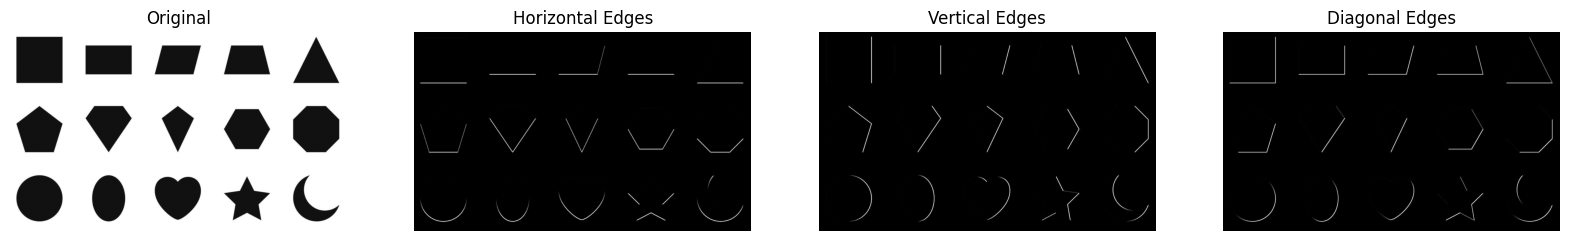

In [2]:
# 결과 시각화
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Horizontal Edges")
plt.imshow(horizontal_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Vertical Edges")
plt.imshow(vertical_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Diagonal Edges")
plt.imshow(diagonal_edges, cmap='gray')
plt.axis('off')

plt.show()


## Hough Transoform을 통한 경계 검출

1. **이미지 로드 및 변환**:
    - `cv2.imread()`를 사용하여 이미지를 읽어옵니다.
    - `cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)`를 통해 이미지를 흑백(그레이스케일)으로 변환합니다.→ Hough Transform은 그레이스케일 이미지에서 에지 정보를 분석하므로 컬러 이미지를 흑백으로 변환해야 합니다.
2. **Canny Edge Detection**:
    - `cv2.Canny()`를 사용하여 에지(Edge)를 검출합니다.
    - 두 개의 임곗값(50, 150)은 약한 에지와 강한 에지의 기준을 설정합니다.
        - 낮은 값(50): 약한 에지를 허용하는 임곗값.
        - 높은 값(150): 강한 에지만 검출하는 임곗값.
    - 에지 검출 결과는 이진 이미지로 반환됩니다.
3. **Hough Transform으로 선 검출**:
    - `cv2.HoughLinesP()`를 통해 이미지에서 선을 검출합니다.
        - `rho`: 거리 간격의 해상도 (1 픽셀).
        - `theta`: 각도 간격의 해상도 (1도 = np.pi/180).
        - `threshold`: 선으로 간주하기 위한 최소 누적값.
        - `minLineLength`: 선으로 간주하기 위한 최소 길이.
        - `maxLineGap`: 두 점 사이의 최대 간격(이 값보다 크면 다른 선으로 간주).
4. **선 그리기**:
    - Hough Transform에서 반환된 `lines` 배열은 검출된 선의 시작점과 끝점을 나타냅니다.
    - `cv2.line()`을 사용하여 각 선을 이미지 위에 표시합니다.
5. **결과 시각화**:
    - `matplotlib`를 사용하여 결과를 시각화합니다.
    - 첫 번째 서브플롯: Canny Edge Detection 결과를 흑백으로 표시.
    - 두 번째 서브플롯: 검출된 선을 표시한 원본 이미지를 컬러로 표시.

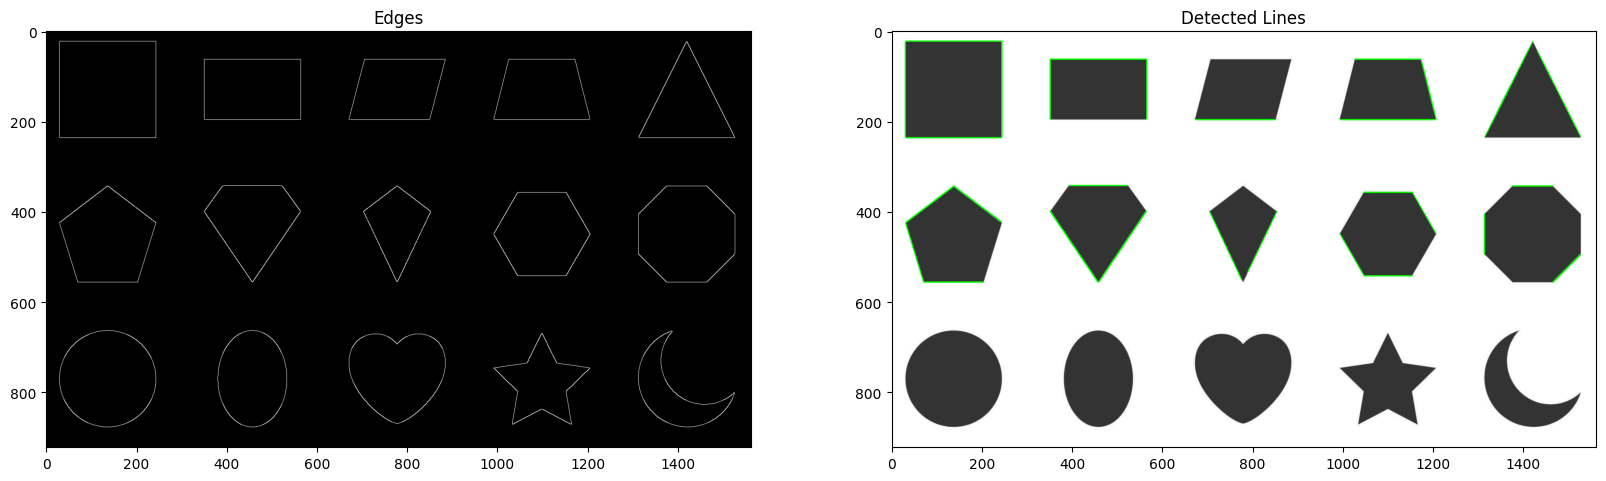

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 및 그레이스케일 변환
image = cv2.imread('shapes.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection
edges = cv2.Canny(gray_image, 50, 150)

# Hough Transform을 활용한 선 검출
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)
# `rho`: 거리 간격의 해상도 (1 픽셀).
# `theta`: 각도 간격의 해상도 (1도 = np.pi/180).
# `threshold`: 선으로 간주하기 위한 최소 누적값.
# `minLineLength`: 선으로 간주하기 위한 최소 길이.
# `maxLineGap`: 두 점 사이의 최대 간격(이 값보다 크면 다른 선으로 간

# 선 그리기
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 결과 시각화
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.title("Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


Original shape (RGB): (512, 512, 3)
Grayscale shape: (512, 512)
CMYK shape: (512, 512, 4)
HSV shape: (512, 512, 3)


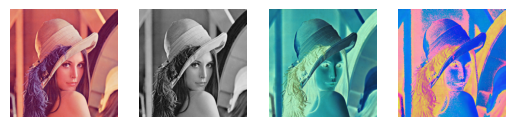

In [4]:
# @title 색상공간 변환


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image = Image.open("Lenna.png")

# 색상 공간 분석
image_array = np.array(image)
print("Original shape (RGB):", image_array.shape)
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(image_array)

# RGB에서 Grayscale로 변환
gray_image = image.convert("L")
gray_array = np.array(gray_image)
print("Grayscale shape:", gray_array.shape)
plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(gray_array, cmap='gray')

cmyk_image = image.convert("CMYK")
cmky_array = np.array(cmyk_image)
print("CMYK shape:", cmky_array.shape)
plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(cmky_array[:,:,:3])


hsv_image = image.convert("HSV")
hsv_array = np.array(hsv_image)
print("HSV shape:", hsv_array.shape)
plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(hsv_array)

# YCbCr

plt.show()


히스토그램 평활화 완료


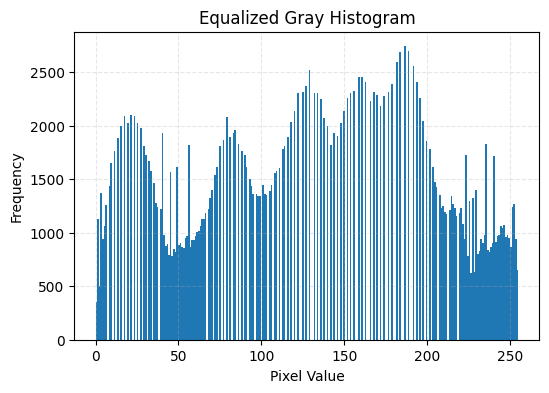

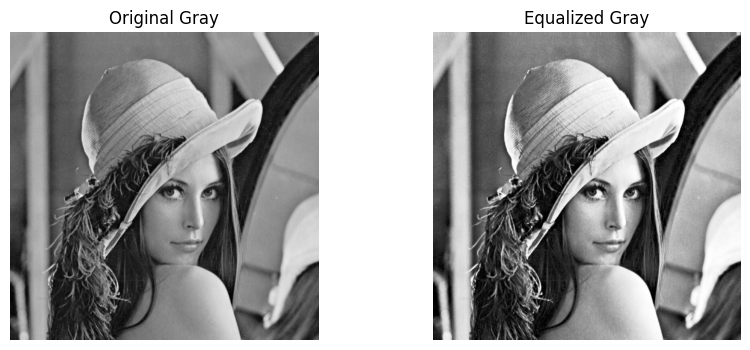

CLAHE 적용 완료


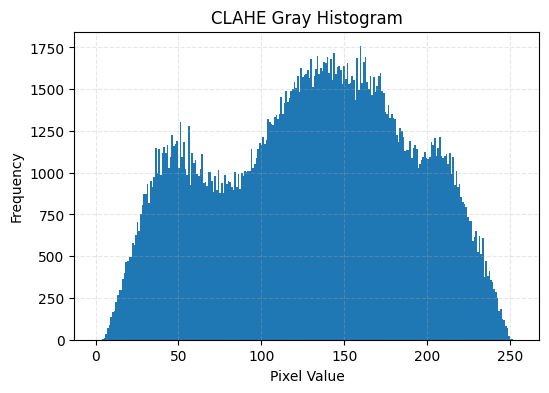

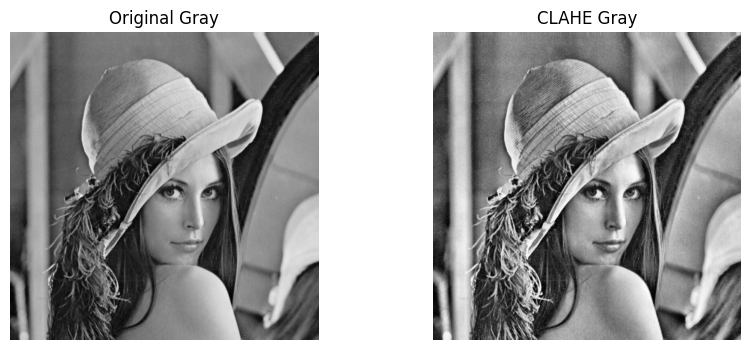

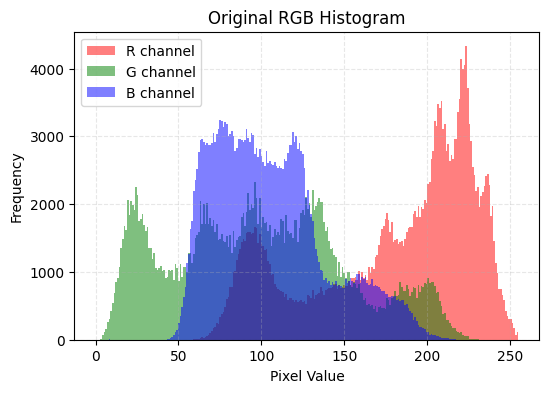

In [5]:
# @title 히스토그램 처리


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

# 그레이 히스토그램
def plot_histogram_gray(gray, title="Gray Histogram"):
    if gray is None:
        return
    plt.figure(figsize=(6,4))
    plt.hist(gray.ravel(), bins=256, range=(0,255))
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

# RGB 히스토그램
def plot_histogram_rgb(arr, title="RGB Histogram"):
    if arr is None or arr.ndim != 3 or arr.shape[2] != 3:
        print("RGB 이미지가 아님")
        return
    plt.figure(figsize=(6,4))
    colors = ['r', 'g', 'b']
    for i, col in enumerate(colors):
        plt.hist(arr[..., i].ravel(), bins=256, range=(0,255), alpha=0.5, color=col, label=f"{col.upper()} channel")
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

# 히스토그램 평활화
def equalize_histogram_gray(gray):
    if gray is None or gray.ndim != 2:
        print("그레이스케일 이미지 필요함")
        return None
    eq = cv2.equalizeHist(gray)
    print("히스토그램 평활화 완료")
    return eq

# CLAHE 적용 (Contrast Limited Adaptive Histogram Equalization)
def clahe_histogram_gray(gray, clipLimit=2.0, tileGridSize=(8,8)):
    if gray is None or gray.ndim != 2:
        print("그레이스케일 이미지 필요함")
        return None
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    cl = clahe.apply(gray)
    print("CLAHE 적용 완료")
    return cl

# 전체 파이프라인
filename = "Lenna.png"

# 원본 RGB 로드
img_rgb = Image.open(filename)

# 그레이스케일 변환
gray = np.array(img_rgb.convert('L'))

# # 원본 히스토그램 시각화
# plot_histogram_gray(gray, title="Original Gray Histogram")

# 히스토그램 평활화 및 비교 시각화
eq = equalize_histogram_gray(gray)
if eq is not None:
    plot_histogram_gray(eq, title="Equalized Gray Histogram")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Gray")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(eq, cmap='gray')
    plt.title("Equalized Gray")
    plt.axis('off')
    plt.show()

# CLAHE 적용 및 비교 시각화
cl = clahe_histogram_gray(gray, clipLimit=2.0, tileGridSize=(8,8))
if cl is not None:
    plot_histogram_gray(cl, title="CLAHE Gray Histogram")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Gray")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(cl, cmap='gray')
    plt.title("CLAHE Gray")
    plt.axis('off')
    plt.show()

# RGB 히스토그램 시각화
img_rgb = np.array(img_rgb)
plot_histogram_rgb(img_rgb, title="Original RGB Histogram")


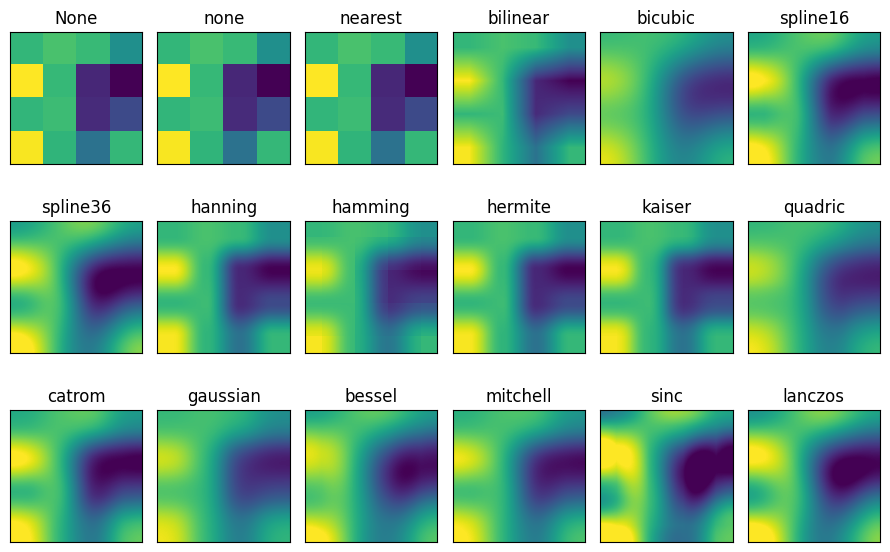

In [9]:
# @title Interpolation 기법


import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

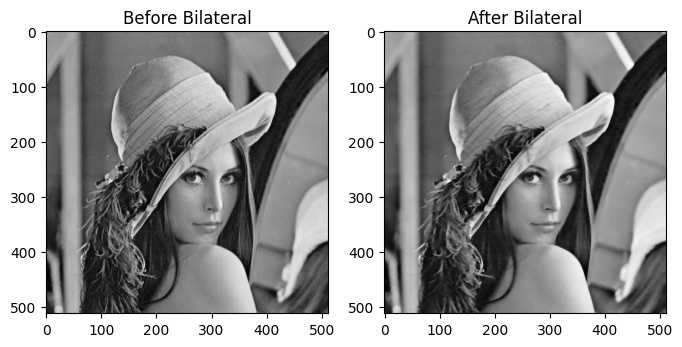

In [22]:
# @title 노이즈제거 - Bilateral denoise
# 가우시안 필터와 경계 필터를 결합

def bilateral_denoise_images(images, d=7, sigmaColor=40, sigmaSpace=50):
    denoised_images = []
    for img in images:
        denoised = cv2.bilateralFilter((img * 255).astype(np.uint8), d, sigmaColor, sigmaSpace)
        denoised = 255-denoised
        denoised_images.append(denoised)

    return np.array(denoised_images) # numpy의 array로 변환

img_path = "Lenna.png"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

train_images_bilateral = bilateral_denoise_images(gray)

# 샘플 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Before Bilateral")

axes[1].imshow(train_images_bilateral, cmap='gray')
axes[1].set_title("After Bilateral")

plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


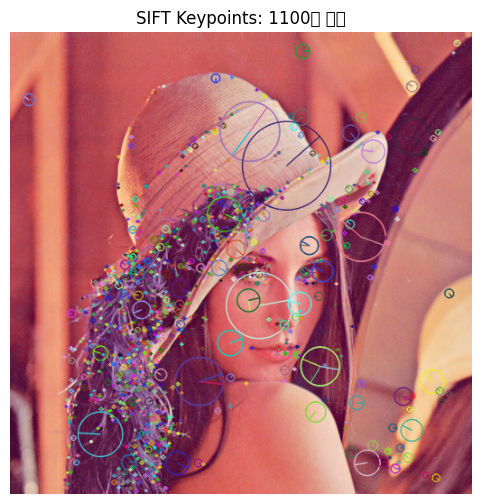

Descriptor shape: (1100, 128)


In [6]:
# @title SIFT

img_path = "Lenna.png"   # 업로드된 첫 번째 파일명을 가져옴


# 2) 라이브러리 임포트 및 이미지 읽기
import cv2
import numpy as np
import matplotlib.pyplot as plt

# OpenCV는 BGR 포맷이므로, 나중에 시각화할 때 RGB로 변환
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3) SIFT 검출기 초기화 및 특징점 검출·디스크립터 계산
sift = cv2.SIFT_create()                # OpenCV ≥4.4
keypoints, descriptors = sift.detectAndCompute(gray, None)

# 4) 검출된 키포인트 그리기 (크기·방향 정보 포함)
img_kp = cv2.drawKeypoints(
    img, keypoints, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# 5) 결과 시각화
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
plt.title(f"SIFT Keypoints: {len(keypoints)}")
plt.axis('off')
plt.show()

# 6) 디스크립터 정보 출력
print("Descriptor shape:", descriptors.shape)   # (키포인트 개수, 128)

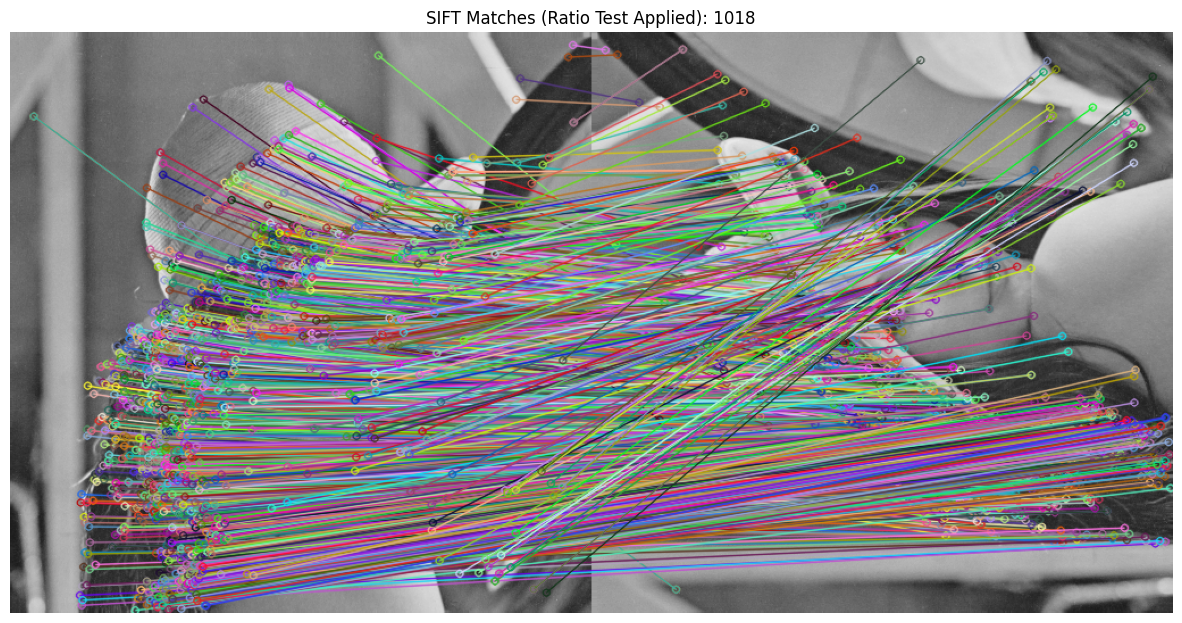

Original Keypoints: 1100
Rotated Keypoints: 1081
Initial Matches (k=2): 1100
Good Matches (after Ratio Test): 1018


In [8]:
import matplotlib.pyplot as plt
# 이미지를 90도 회전
rows, cols = gray.shape
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0), 90, 1)
rotated_gray = cv2.warpAffine(gray, M, (cols, rows))

# 회전된 이미지에서 특징점 검출 및 디스크립터 계산
rotated_keypoints, rotated_descriptors = sift.detectAndCompute(rotated_gray, None)

# FLANN 기반 매처 초기화 (SIFT/SURF 디스크립터에 적합)
# IndexParams: 사용하는 알고리즘에 따라 설정 (SIFT/SURF는 FLANN_INDEX_KDTREE)
# SearchParams: K-NN 탐색 시 사용할 파라미터 (checks: 트리를 탐색할 횟수)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# 두 이미지의 디스크립터 매칭
# descriptors: 원본 이미지의 디스크립터
# rotated_descriptors: 회전된 이미지의 디스크립터
# k=2: 각 디스크립터에 대해 가장 가까운 2개의 이웃을 찾음 (Ratio Test를 위해)
matches = flann.knnMatch(descriptors, rotated_descriptors, k=2)

# Ratio Test를 사용하여 좋은 매치만 선별
# Lowe's Ratio Test: 가장 가까운 이웃까지의 거리가 두 번째로 가까운 이웃까지의 거리의 특정 비율(여기서는 0.7)보다 작으면 좋은 매치로 간주
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# 매칭 결과 시각화
# drawMatchesKnnFlags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS: 단일 특징점은 그리지 않고, 매칭된 선만 그림
img_matches = cv2.drawMatches(gray, keypoints, rotated_gray, rotated_keypoints, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
plt.figure(figsize=(15, 10))
plt.imshow(img_matches)
plt.title(f"SIFT Matches (Ratio Test Applied): {len(good_matches)}")
plt.axis('off')
plt.show()

print(f"Original Keypoints: {len(keypoints)}")
print(f"Rotated Keypoints: {len(rotated_keypoints)}")
print(f"Initial Matches (k=2): {len(matches)}")
print(f"Good Matches (after Ratio Test): {len(good_matches)}")
